# Breast Cancer Machine Learning Models

**Problem Statement:** This project aims to develop a robust machine learning model to accurately predict breast cancer diagnosis (benign or malignant) using the Wisconsin Breast Cancer (Diagnostic) dataset. 


**Approach:** We begin with exploratory data analysis to understand the dataset, followed by data preprocessing to prepare the data for modeling. We then train and evaluate several classification models, comparing their performance using various metrics. Finally, we create an ensemble model to potentially enhance predictive accuracy through a voting mechanism.

This Jupyter Notebook presents a comprehensive analysis of the Wisconsin Breast Cancer (Diagnostic) dataset, aiming to develop and evaluate various machine learning models for predicting breast cancer diagnosis. We will explore the dataset, preprocess the data, train and evaluate several classification algorithms, and finally, create an ensemble model to improve prediction accuracy.

In [2]:
# Import necessary libraries (assumed based on usage)
# warning library doesn't need but imported if you changing solver
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)
%matplotlib inline

We import libraries like NumPy and Pandas for data manipulation, Seaborn and Matplotlib for visualization, Scikit-learn for machine learning algorithms and evaluation metrics, and XGBoost for gradient boosting models.

## Loading the Wisconsin Breast Cancer Dataset
We load the dataset from a CSV file named *breast_cancer_combined.csv* into a Pandas DataFrame.

In [3]:
# Load the dataset from a CSV file
df= pd.read_csv('dataset/breast_cancer_combined.csv')

## Exploratory Data Analysis (EDA)
We perform exploratory data analysis to understand the dataset's structure, identify potential issues, and gain insights into the data.

In [4]:
# Display the dimensions of the dataframe (rows, columns)
df.shape

(1284, 33)

In [5]:
# Show the first 5 rows of the dataframe for a quick overview
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# Print a concise summary of the dataframe, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    float64
 1   diagnosis                1284 non-null   object 
 2   radius_mean              1284 non-null   float64
 3   texture_mean             1284 non-null   float64
 4   perimeter_mean           1284 non-null   float64
 5   area_mean                1284 non-null   float64
 6   smoothness_mean          1284 non-null   float64
 7   compactness_mean         1284 non-null   float64
 8   concavity_mean           1284 non-null   float64
 9   concave points_mean      1284 non-null   float64
 10  symmetry_mean            1284 non-null   float64
 11  fractal_dimension_mean   1284 non-null   float64
 12  radius_se                1284 non-null   float64
 13  texture_se               1284 non-null   float64
 14  perimeter_se            

In [7]:
# Display the data types of each column
df.dtypes

id                         float64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
# Count the occurrences of each unique value in the 'diagnosis' column
df['diagnosis'].value_counts()

B    714
M    570
Name: diagnosis, dtype: int64

- **df.shape**: Displays the number of rows and columns in the DataFrame.
- **df.head()**: Shows the first 5 rows of the DataFrame, providing a quick overview of the data.
- **df.info()**: Prints a concise summary of the DataFrame, including data types and non-null counts.
- **df.dtypes**: Displays the data types of each column.
- **df['diagnosis'].value_counts()**: Counts the occurrences of each unique value in the 'diagnosis' column, showing the distribution of benign and malignant tumors.

This analysis helps us understand the dataset's structure, identify missing values, and observe the distribution of the target variable.

## Data Preprocessing for Model Training
We prepare the data for machine learning by selecting features, encoding the target variable, splitting the data into training and testing sets, and scaling the features.

In [9]:
# Prepare features (X) by dropping unnecessary columns
# 'Unnamed: 32' is likely an artifact column, 'id' is not predictive, and 'diagnosis' is the target
x= df.drop(columns=['Unnamed: 32', 'id', 'diagnosis'])
# Prepare target variable (y) by mapping 'M' (malignant) to 1 and 'B' (benign) to 0
y= df['diagnosis'].map({'M': 1, 'B': 0})

In [10]:
# Print the shapes of the feature and target datasets to verify dimensions
print(x.shape, y.shape)

(1284, 30) (1284,)


- We drop the 'Unnamed: 32' and 'id' columns as they are not relevant for prediction.
- We map 'M' (malignant) to 1 and 'B' (benign) to 0 in the 'diagnosis' column.

In [11]:
# Split the data into training and testing sets
# test_size=0.2 means 20% for testing, random_state=42 ensures reproducibility
x_train, x_test, y_train, y_test= train_test_split( x, y,
                                                    test_size=0.2,
                                                    random_state= 42)

In [12]:
# Print the shapes of the training and testing sets to confirm the split
print(x_train.shape, x_test.shape,
      y_train.shape, y_test.shape)

(1027, 30) (257, 30) (1027,) (257,)


In [13]:
# Display the class distribution in the training and test set as proportions
print(y_train.value_counts()/ y_train.shape[0], '\n', '-'*50)
print(y_test.value_counts()/ y_test.shape[0], '\n', '-'*50)
# Calculate and display the class distribution in the full dataset as percentages
df['diagnosis'].value_counts()/ len(df)* 100

0    0.54333
1    0.45667
Name: diagnosis, dtype: float64 
 --------------------------------------------------
0    0.607004
1    0.392996
Name: diagnosis, dtype: float64 
 --------------------------------------------------


B    55.607477
M    44.392523
Name: diagnosis, dtype: float64

- We split the data into 80% training and 20% testing sets using train_test_split.
- We verify the shapes of the training and testing sets and check the class distribution in each set to ensure they are consistent.

In [14]:
# Normilizing our data
scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

We scale the features using StandardScaler to normalize the data, ensuring that all features have a mean of 0 and a standard deviation of 1.

## Model Training and Performance Evaluation
We train and evaluate several machine learning models using the preprocessed data.

In [15]:
# Define a list of machine learning models to iterate and compare over them
models= [
    SVC(),
    LinearSVC(max_iter= 10**5, C= 0.1),
    RandomForestClassifier(class_weight= 'balanced'),
    LogisticRegression(solver= 'lbfgs' ,max_iter=10**5 ,class_weight= 'balanced'),
    DecisionTreeClassifier(),
    XGBClassifier(n_jobs= -1),
    XGBRFClassifier(n_jobs= -1)
]

We define a list of models to train and evaluate, including Support Vector Classifier (SVC), Linear SVC, Random Forest, Logistic Regression, Decision Tree, XGBoost Classifier, and XGBoost Random Forest Classifier.

In [16]:
# Function to compute model evaluation metrics
def model_metrics(y_true, y_pred):
    acc_s = accuracy_score(y_true, y_pred)
    f1_class_1 = f1_score(y_true, y_pred, pos_label=1)
    f1_class_0 = f1_score(y_true, y_pred, pos_label=0)
    cm = confusion_matrix(y_true, y_pred)
    return acc_s, f1_class_1, f1_class_0, cm

We define functions to calculate evaluation metrics (accuracy, F1-score, confusion matrix) and plot the confusion matrix.

In [17]:
# Function to plot confusion matrix
def plot_cm(cm):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    return

In [18]:
results = {}

# Define a function to train a model and compute its performance metrics
def model_description(model, x_train, y_train, x_test, y_test):
    trained_model = model.fit(x_train, y_train)
    
    # Predictions
    train_preds = trained_model.predict(x_train)
    test_preds = trained_model.predict(x_test)
    
    # Compute evaluation metrics
    acc_train, f1_1_train, f1_0_train, cm_train = model_metrics(y_train, train_preds)
    acc_test, f1_1_test, f1_0_test, cm_test = model_metrics(y_test, test_preds)

    # Store results in dictionary
    results[model.__class__.__name__] = {
        "Train Accuracy": acc_train,
        "Train F1 Class 1": f1_1_train,
        "Train F1 Class 0": f1_0_train,
        "Test Accuracy": acc_test,
        "Test F1 Class 1": f1_1_test,
        "Test F1 Class 0": f1_0_test,
        "Confusion Matrix Train": cm_train,
        "Confusion Matrix Test": cm_test
    }
    return results

In [19]:
# Iterate over each model and evaluate its performance
for model in models:
    model_description(model, x_train, y_train, x_test, y_test)

In [20]:
# Function to visualize stored confusion matrices
def plot_stored_cm(model_name):
    if model_name in results:
        print(f"\nConfusion Matrix for {model_name} (Train):")
        plot_cm(results[model_name]["Confusion Matrix Train"])
        
        print(f"Confusion Matrix for {model_name} (Test):")
        plot_cm(results[model_name]["Confusion Matrix Test"])
    else:
        print(f"Model '{model_name}' not found in results.")
    return


=== Model Performance Summary ===

📌 Model: SVC
Train Accuracy: 0.8695
Train F1 Score (Class 1): 0.8511
Train F1 Score (Class 0): 0.8839
Test Accuracy: 0.8872
Test F1 Score (Class 1): 0.8557
Test F1 Score (Class 0): 0.9073

📌 Model: LinearSVC
Train Accuracy: 0.9523
Train F1 Score (Class 1): 0.9491
Train F1 Score (Class 0): 0.9551
Test Accuracy: 0.9611
Test F1 Score (Class 1): 0.9515
Test F1 Score (Class 0): 0.9675

📌 Model: RandomForestClassifier
Train Accuracy: 1.0000
Train F1 Score (Class 1): 1.0000
Train F1 Score (Class 0): 1.0000
Test Accuracy: 0.9922
Test F1 Score (Class 1): 0.9900
Test F1 Score (Class 0): 0.9936

📌 Model: LogisticRegression
Train Accuracy: 0.9581
Train F1 Score (Class 1): 0.9544
Train F1 Score (Class 0): 0.9613
Test Accuracy: 0.9689
Test F1 Score (Class 1): 0.9596
Test F1 Score (Class 0): 0.9747

📌 Model: DecisionTreeClassifier
Train Accuracy: 1.0000
Train F1 Score (Class 1): 1.0000
Train F1 Score (Class 0): 1.0000
Test Accuracy: 0.9922
Test F1 Score (Class 1): 

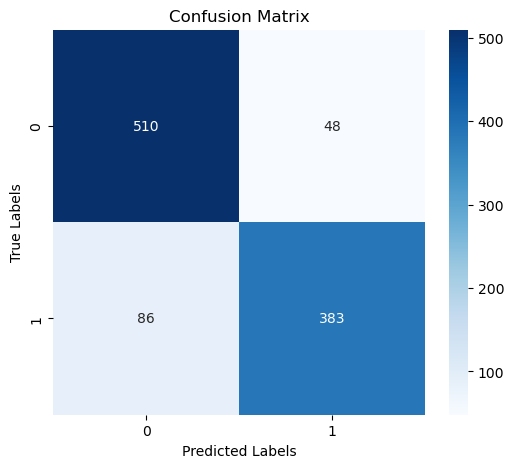

🔹 Confusion Matrix for SVC (Test):


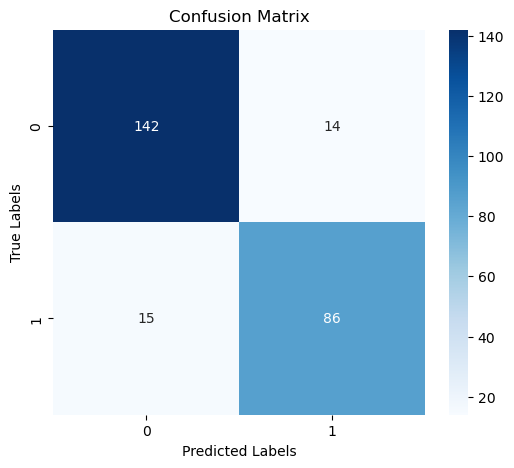


🔹 Confusion Matrix for LinearSVC (Train):


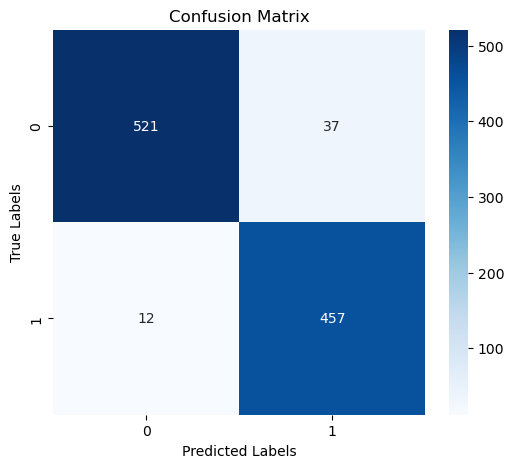

🔹 Confusion Matrix for LinearSVC (Test):


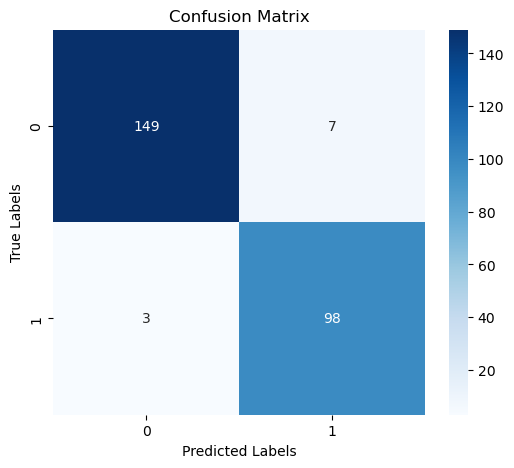


🔹 Confusion Matrix for RandomForestClassifier (Train):


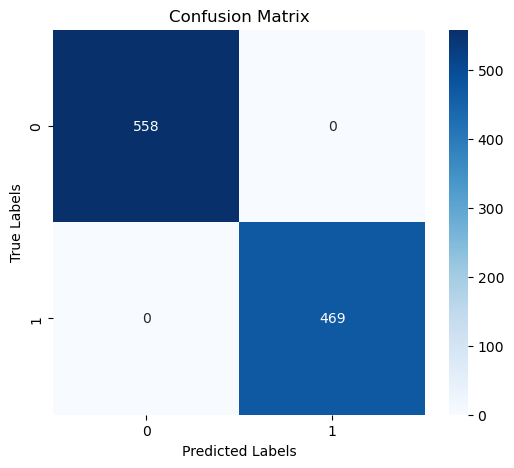

🔹 Confusion Matrix for RandomForestClassifier (Test):


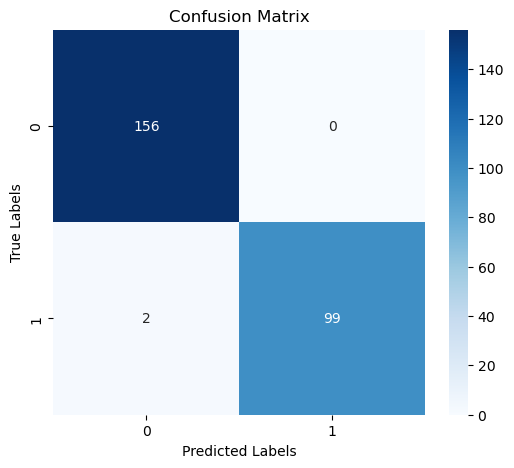


🔹 Confusion Matrix for LogisticRegression (Train):


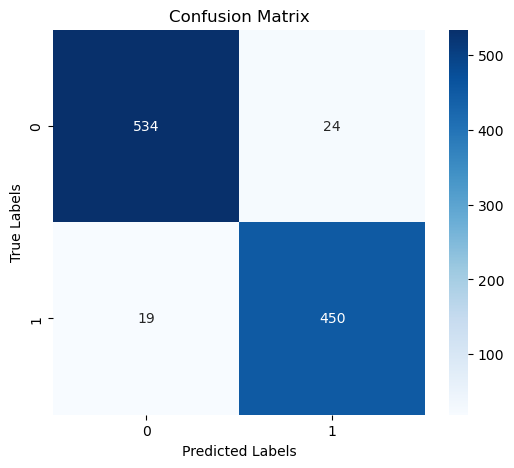

🔹 Confusion Matrix for LogisticRegression (Test):


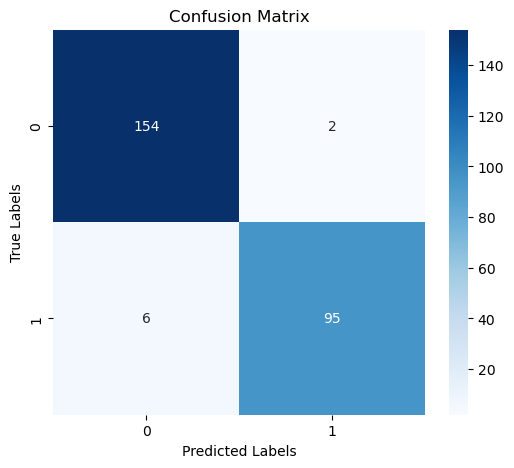


🔹 Confusion Matrix for DecisionTreeClassifier (Train):


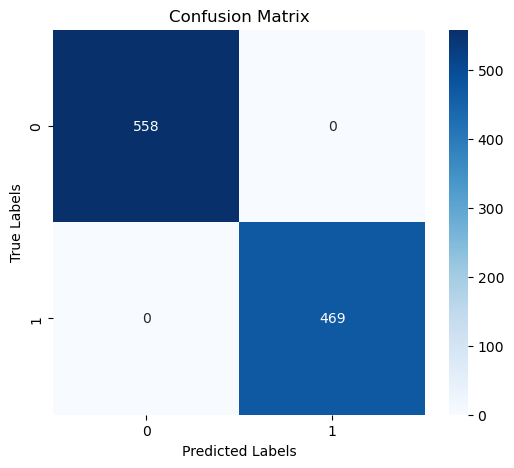

🔹 Confusion Matrix for DecisionTreeClassifier (Test):


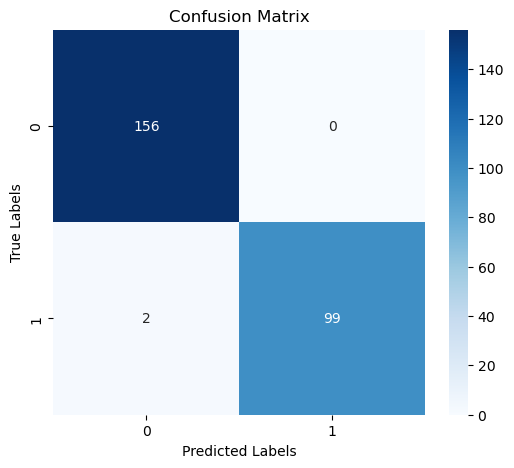


🔹 Confusion Matrix for XGBClassifier (Train):


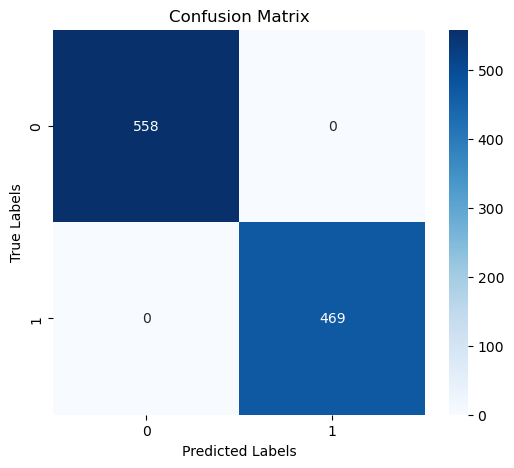

🔹 Confusion Matrix for XGBClassifier (Test):


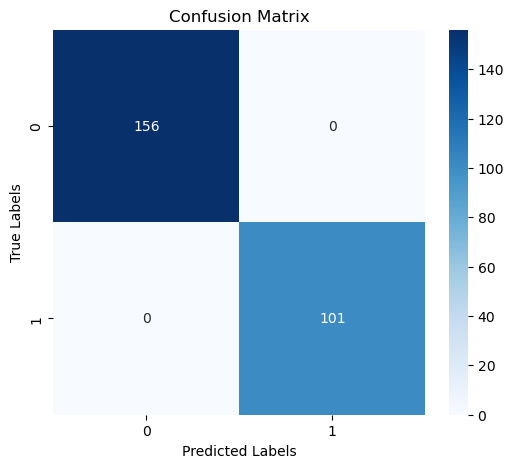


🔹 Confusion Matrix for XGBRFClassifier (Train):


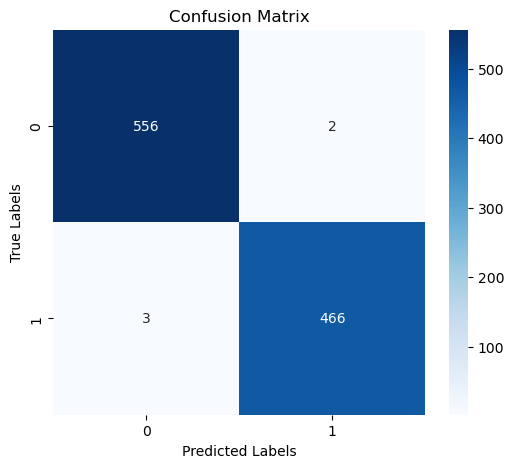

🔹 Confusion Matrix for XGBRFClassifier (Test):


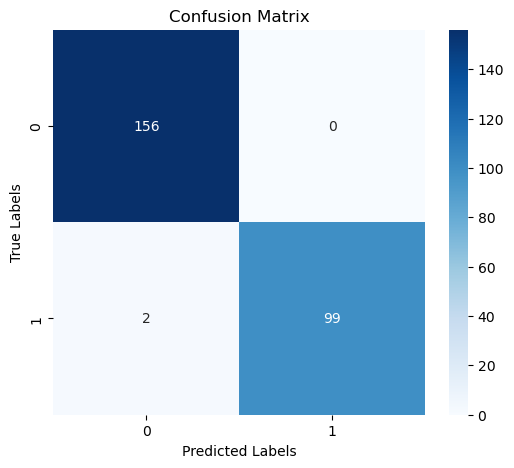

In [21]:
# Define a function to display a summary of model performance metrics
def display_results():
    print("\n=== Model Performance Summary ===")
    for model_name, metrics in results.items():
        print(f"\n📌 Model: {model_name}")
        print(f"Train Accuracy: {metrics['Train Accuracy']:.4f}")
        print(f"Train F1 Score (Class 1): {metrics['Train F1 Class 1']:.4f}")
        print(f"Train F1 Score (Class 0): {metrics['Train F1 Class 0']:.4f}")
        print(f"Test Accuracy: {metrics['Test Accuracy']:.4f}")
        print(f"Test F1 Score (Class 1): {metrics['Test F1 Class 1']:.4f}")
        print(f"Test F1 Score (Class 0): {metrics['Test F1 Class 0']:.4f}")

    print("\n=== Confusion Matrices ===")
    for model_name, metrics in results.items():
        print(f"\n🔹 Confusion Matrix for {model_name} (Train):")
        plot_cm(metrics["Confusion Matrix Train"])
        
        print(f"🔹 Confusion Matrix for {model_name} (Test):")
        plot_cm(metrics["Confusion Matrix Test"])

    return
# Run the function to display results in order
display_results()

- We iterate over each model, train it on the scaled training data, make predictions on the training and testing sets, and store the evaluation metrics in the results dictionary.
- The *display_results* function prints a summary of the model performance metrics and visualizes the confusion matrices for each model

## Ensemble Model Creation and Evaluation
We create an ensemble model by combining the predictions of all individual models to potentially improve prediction accuracy.


=== Ensemble Model Summary ===
Accuracy Score : 0.9969
F1 Score (Class 1) : 0.9965
F1 Score (Class 0) : 0.9972

🔹 Confusion Matrix  


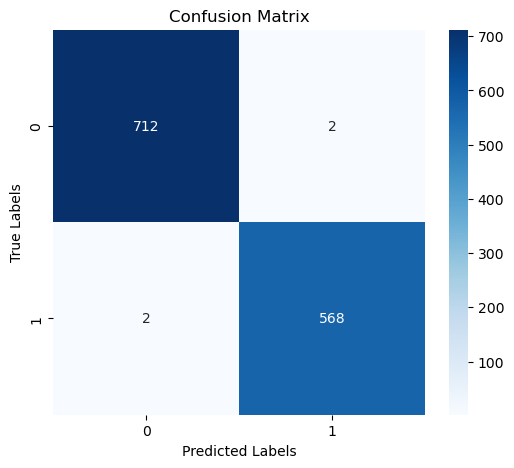

In [29]:
# store individual models and train models on whole datas
all_preds = []
for model in models:
    trained_model= model.fit(x, y)
    all_preds.append(trained_model.predict(x))

# Convert to numpy arrays for easy computation   
all_preds= np.array(all_preds)
# compute mode acroos all model predictions
final_preds= mode(all_preds, axis= 0, keepdims= True).mode[0]
# Compute final evaluation metrics
acc_s, f1_1, f1_0, cm= model_metrics(y, final_preds)
# Store final ensemble model results
results["Ensemble_Model"] = {
    "Accuracy Score": acc_s,
    "F1 Class 1": f1_1,
    "F1 Class 0": f1_0,
    "Confusion Matrix": cm
}

# Display the final ensemble results
print(f"\n=== Ensemble Model Summary ===")
print(f"Accuracy Score : {results['Ensemble_Model']['Accuracy Score']:.4f}")
print(f"F1 Score (Class 1) : {results['Ensemble_Model']['F1 Class 1']:.4f}")
print(f"F1 Score (Class 0) : {results['Ensemble_Model']['F1 Class 0']:.4f}")
print(f"\n🔹 Confusion Matrix  ")
plot_cm(cm)

- We train each model on the scaled training data and collect their predictions on the scaled testing data.
- We use the $mode$ function from *scipy.stats* to determine the majority vote (most frequent prediction) across all models for each data point.
- We evaluate the ensemble model's performance on the testing set and store the results.
- We print the summary of the ensemble model's performance metrics and visualize its confusion matrix.

## Conclusion
In this project, we successfully developed and evaluated several machine learning models for breast cancer diagnosis using the Wisconsin Breast Cancer (Diagnostic) dataset. Through exploratory data analysis, data preprocessing, and model training, we achieved high accuracy in predicting whether a tumor is benign or malignant.

The ensemble model, which combined the predictions of multiple individual models, showed promising results, demonstrating the potential benefits of ensemble techniques in improving prediction accuracy. Notably, models like *XGBoost* and *Random Forest* consistently performed well, highlighting their effectiveness in this classification task.

This project underscores the significance of machine learning in medical diagnostics, showcasing its potential to aid in early detection and improved patient outcomes. Future work could explore further optimization of the models, including hyperparameter tuning and feature engineering, as well as the incorporation of additional data sources to enhance predictive capabilities. Furthermore, the application of deep learning models could be investigated to potentially capture more complex patterns within the data.